In [1]:
from urn_packages import *
from tail_functions import *
from binary_tree_functions import *
from urn_functions import *
from plotting_functions import add_labels

In [2]:
#directory to save plots
direc_save ='/home/samuel/Documents/other/other_p/research/urns/code/urn_python_code/plots/' 

In [3]:
#Font sizes and labels for plots
font_sizes=[15,15,15,15,15]
font_sizes1=[15,15,15,15,12]
label_arrI=[r'$\omega$',r'$\mathbb{P}(I_n\geq\omega)$',font_sizes,1]
label_arrL=[r'$\omega$',r'$\mathbb{P}(L_n\geq\omega)$',font_sizes,1]
label_arr=[r'$\omega$',r'$\mathbb{P}(W\geq\omega)$',font_sizes,1]
label_arr0=[r'$\omega$',r'$\mathbb{P}(W\geq\omega)$',font_sizes,0]

## C++ urn simulations, read in and plot

$N=1000$ agents for iterations $n=10^6,10^7,10^8,10^9$ with inital agents each with $1$ and feedback function
$f(w)=w^{\gamma}$ for $\gamma=1,1.1,1.2,1.3$

https://stackoverflow.com/questions/35672809/how-to-read-a-list-of-txt-files-in-a-folder-in-python

In [4]:
'''
Read in .txt files from directory, order the files by the names. 
Each file the output of the feedback model simulation in C++
'''

import glob
direc="/home/samuel/Documents/other/other_p/research/urns/code/urn_C++_code/output/"
txt_files = glob.glob(direc+"*.txt")
txt_files_arr=np.asarray(txt_files)
k=len(direc)

time_gamma=[]

for i in range(len(txt_files)):
    time=int(txt_files[i][k+1:k+2])
    gamma=float(txt_files[i][k+3:k+6])
    time_gamma.append([time,gamma])
    
#gets indices of sorted array sorted by second then first element
#https://stackoverflow.com/questions/7851077/how-to-return-index-of-a-sorted-list 
arg_sort=sorted(range(len(time_gamma)), key=lambda x: [time_gamma[x][1],time_gamma[x][0]]) 

txt_files_arr_sort=txt_files_arr[arg_sort]

data_arr_names = []
data_arr = []
for i in range(len(txt_files_arr_sort)):
    data_arr_names.append(txt_files_arr_sort[i][k:k+6])
    data=pd.read_csv(txt_files_arr_sort[i],sep='\t').values
    data_arr.append(data.ravel())
    
data_dict = {}

for i in range(len(data_arr)):
    data_dict[data_arr_names[i]]=data_arr[i]

print('File labels are:')
print(data_arr_names)

############################################################################

'''
Now take the empirical tail and fit exponential or power law with MLE
'''

tails_x_y=[]
exp_fits=[]
tail_fits=[]

for i in range(len(data_arr_names)):
    d=data_dict[data_arr_names[i]]
    x,y=tail(d)
    tails_x_y.append([x,y])
    if(i<4):
        l=mle_exp_lambda(d)
        y_exp=exp_tail(x,l)
        exp_fits.append([x,y_exp])
    else:
        es,x_min=x_min_pred(d)
        x_pf,y_pf,a,b=get_power_law_fit(d,x_min)
        tail_fits.append([x_pf,y_pf,a,b])
        
        

File labels are:
['t1g1.0', 't2g1.0', 't3g1.0', 't4g1.0', 't1g1.1', 't2g1.1', 't3g1.1', 't4g1.1', 't1g1.2', 't2g1.2', 't3g1.2', 't4g1.2', 't1g1.3', 't2g1.3', 't3g1.3', 't4g1.3']


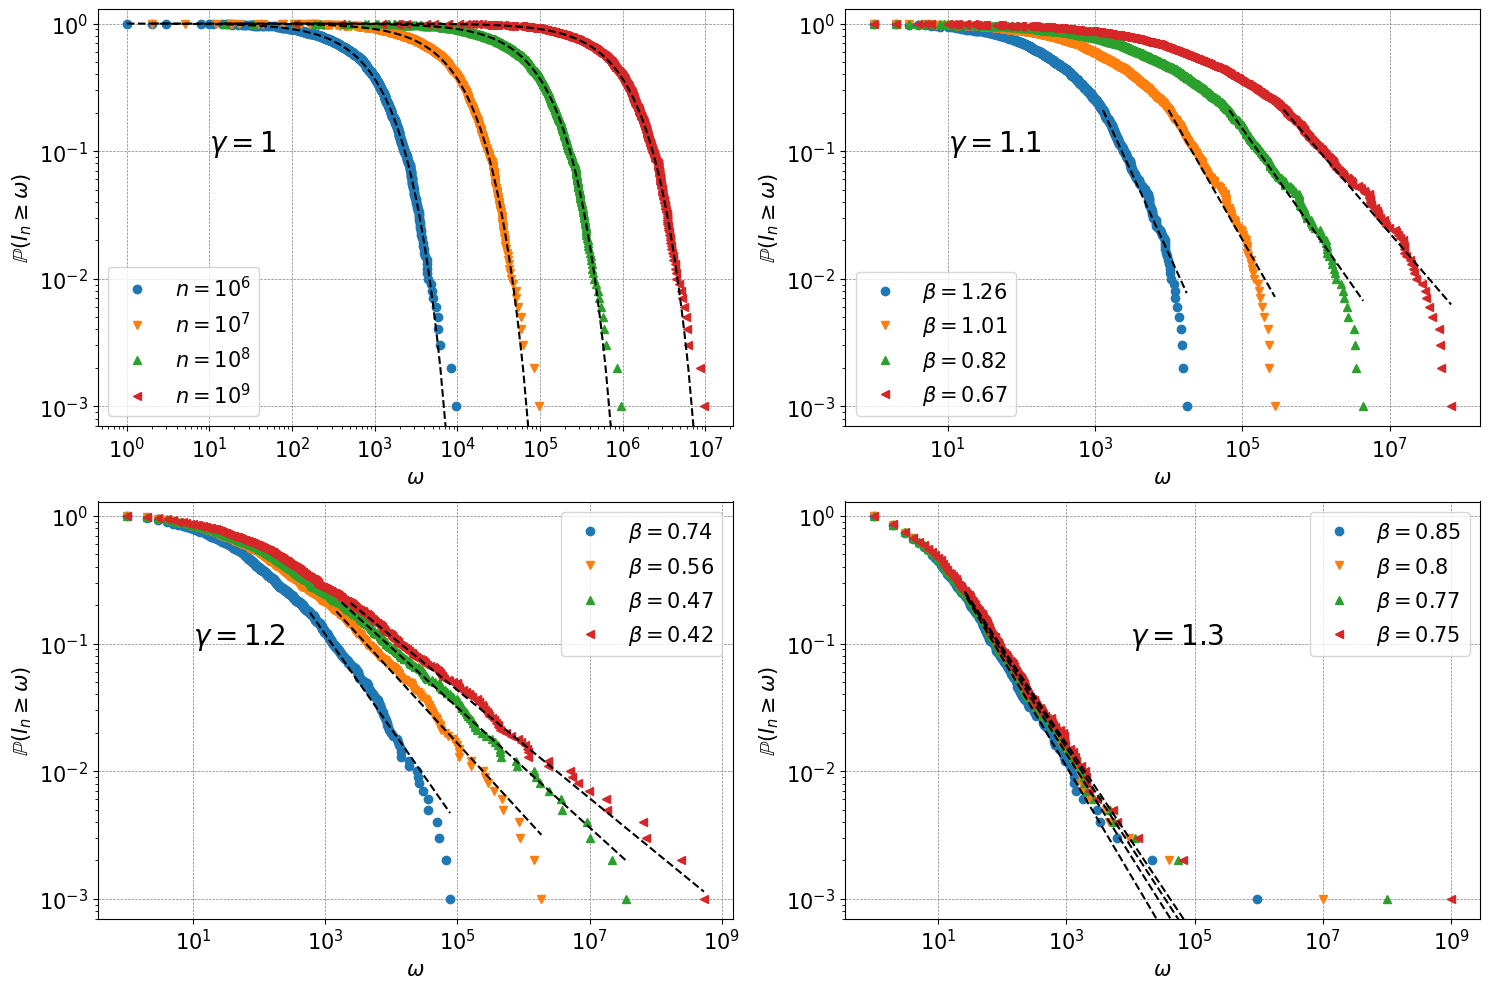

In [5]:
#Resulting plots of above

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.loglog(*tails_x_y[0],'o',label=r'$n=10^6$')
plt.loglog(*tails_x_y[1],'v',label=r'$n=10^7$')
plt.loglog(*tails_x_y[2],'^',label=r'$n=10^8$')
plt.loglog(*tails_x_y[3],'<',label=r'$n=10^9$')

plt.loglog(*exp_fits[0],linestyle='--',color='black')
plt.loglog(*exp_fits[1],linestyle='--',color='black')
plt.loglog(*exp_fits[2],linestyle='--',color='black')
plt.loglog(*exp_fits[3],linestyle='--',color='black')

add_labels(plt,*label_arrI)
plt.text(10,10**-1,r'$\gamma=1$',fontsize=20)
plt.ylim(7*10**-4,1.3)

plt.subplot(2,2,2)
plt.loglog(*tails_x_y[4],'o',label=r'$\beta={}$'.format(np.round(tail_fits[0][3],2)))
plt.loglog(*tails_x_y[5],'v',label=r'$\beta={}$'.format(np.round(tail_fits[1][3],2)))
plt.loglog(*tails_x_y[6],'^',label=r'$\beta={}$'.format(np.round(tail_fits[2][3],2)))
plt.loglog(*tails_x_y[7],'<',label=r'$\beta={}$'.format(np.round(tail_fits[3][3],2)))

plt.loglog(tail_fits[0][0],tail_fits[0][1],linestyle='--',color='black')
plt.loglog(tail_fits[1][0],tail_fits[1][1],linestyle='--',color='black')
plt.loglog(tail_fits[2][0],tail_fits[2][1],linestyle='--',color='black')
plt.loglog(tail_fits[3][0],tail_fits[3][1],linestyle='--',color='black')

add_labels(plt,*label_arrI)
plt.text(10,10**-1,r'$\gamma=1.1$',fontsize=20)
plt.ylim(7*10**-4,1.3)


plt.subplot(2,2,3)
plt.loglog(*tails_x_y[8],'o',label=r'$\beta={}$'.format(np.round(tail_fits[4][3],2)))
plt.loglog(*tails_x_y[9],'v',label=r'$\beta={}$'.format(np.round(tail_fits[5][3],2)))
plt.loglog(*tails_x_y[10],'^',label=r'$\beta={}$'.format(np.round(tail_fits[6][3],2)))
plt.loglog(*tails_x_y[11],'<',label=r'$\beta={}$'.format(np.round(tail_fits[7][3],2)))

plt.loglog(tail_fits[4][0],tail_fits[4][1],linestyle='--',color='black')
plt.loglog(tail_fits[5][0],tail_fits[5][1],linestyle='--',color='black')
plt.loglog(tail_fits[6][0],tail_fits[6][1],linestyle='--',color='black')
plt.loglog(tail_fits[7][0],tail_fits[7][1],linestyle='--',color='black')

add_labels(plt,*label_arrI)
plt.text(10,10**-1,r'$\gamma=1.2$',fontsize=20)
plt.ylim(7*10**-4,1.3)

plt.subplot(2,2,4)
plt.loglog(*tails_x_y[12],'o',label=r'$\beta={}$'.format(np.round(tail_fits[8][3],2)))
plt.loglog(*tails_x_y[13],'v',label=r'$\beta={}$'.format(np.round(tail_fits[9][3],2)))
plt.loglog(*tails_x_y[14],'^',label=r'$\beta={}$'.format(np.round(tail_fits[10][3],2)))
plt.loglog(*tails_x_y[15],'<',label=r'$\beta={}$'.format(np.round(tail_fits[11][3],2)))

plt.loglog(tail_fits[8][0],tail_fits[8][1],linestyle='--',color='black')
plt.loglog(tail_fits[9][0],tail_fits[9][1],linestyle='--',color='black')
plt.loglog(tail_fits[10][0],tail_fits[10][1],linestyle='--',color='black')
plt.loglog(tail_fits[11][0],tail_fits[11][1],linestyle='--',color='black')

add_labels(plt,*label_arrI)
plt.text(10**4,10**-1,r'$\gamma=1.3$',fontsize=20)
plt.ylim(7*10**-4,1.3)

plt.tight_layout()

# plt.savefig(direc_save+'urn_cpp_tails',bbox_inches = 'tight')

## Run urn model in python

(array([], dtype=int64),)


<module 'matplotlib.pyplot' from '/home/samuel/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

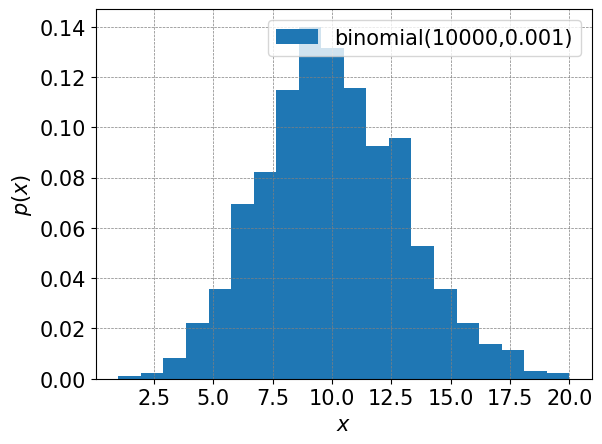

In [6]:
from scipy.stats import binom

#number of agents
N=10
N3=10**3

#All agents start equally with w0v
w0v=1

#Initial values of agents
w0=np.ones(N)*w0v 
w03=np.ones(N3)*w0v 
w0_binom=binom.rvs(n=N3*10,p=1/N3,size=N3)
print(np.where(w0_binom==0)) #unlikely to be 0 so should be empty vector

#Gamma values
g1=1
g1_1=1.1
g1_2=1.2
g1_3=1.3
gs=[g1,g1_1,g1_2,g1_3]

#Value to add at each iteration of urn model
w_add=1

#Number of iterations to run
T=10**5
T1=10**6
T2=10**7

#Font sizes and labels for binomial dist. plot
label_arr_binom=[r'$x$',r'$p(x)$',font_sizes,1]
plt.hist(w0_binom,bins=20,density=True,label=r'binomial({},{})'.format(N3*10,1/N3))
add_labels(plt,*label_arr_binom)

Both functions below run the same urn model and we see it is faster when binary search is used

In [7]:
# %%time
# test1=nl_Polya_urn_stand(w0,w_add,g1,T)

In [8]:
# %%time
# test2=nl_Polya_urn_stand_bt(w0,w_add,g1,T)

## Approximation for expectation with fitness

Run feedback model for different $\gamma$, approximate $t$ that this corresponds to in birth process and plot 
$W_t$ against $\mathbb{E}[W_t].$

CPU times: user 44 ms, sys: 12 ms, total: 56 ms
Wall time: 28.7 ms


<module 'matplotlib.pyplot' from '/home/samuel/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

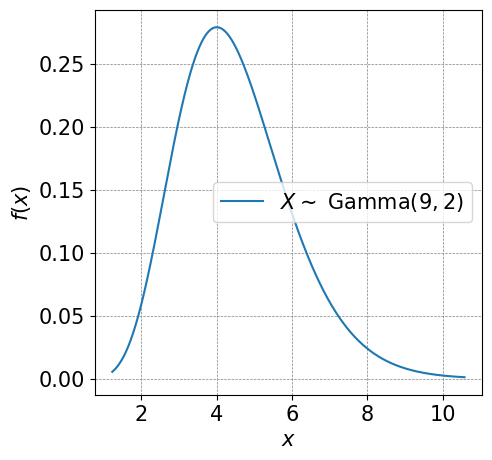

In [9]:
%%time

from scipy.stats import gamma as gamma_dist

'''
Gamma distributed fitness with plot of distribution 
(want fitness >0 which is why can choose gamma distribution for example)
'''


interval=1000
lq=0.001
uq=0.999
alpha=9
beta=2

fitness=gamma_dist.rvs(a=alpha,scale=1/beta,size=N3)
x_gamma = np.linspace(gamma_dist.ppf(lq, a=alpha,scale=1/beta),\
gamma_dist.ppf(uq, a=alpha,scale=1/beta), interval)
y_gamma=gamma_dist.pdf(x_gamma,a=alpha,scale=1/beta)

#Font sizes and labels for gamma dist. plot
label_arr_gamma=[r'$x$',r'$f(x)$',font_sizes,1]

plt.figure(figsize=(5,5))

plt.plot(x_gamma,y_gamma,label=r'$X \sim$ Gamma$({},{})$'.format(alpha,beta))
add_labels(plt,*label_arr_gamma)


In [10]:
%%time
'''
Run feedback model with the above gamma fitness for different gammas gs and fit power law with MLE
'''

w_fitness=[]
tails_fitness=[]
fitness_tail_fits=[]

for i in tqdm(range(len(gs))):
    w_fitness_g=nl_Polya_urn_stand_bt_fit(w0_binom,w_add,fitness,gs[i],T1)
    x,y=tail(w_fitness_g)
    w_fitness.append(w_fitness_g)
    tails_fitness.append([x,y])
    if i>0:
        es,x_min=x_min_pred(w_fitness_g)
        x_pf,y_pf,a,b=get_power_law_fit(w_fitness_g,x_min)
        fitness_tail_fits.append([x_pf,y_pf,a,b])

100%|█████████████████████████████████████████████| 4/4 [04:25<00:00, 66.32s/it]

CPU times: user 4min 24s, sys: 84 ms, total: 4min 24s
Wall time: 4min 25s


(0.0005, 1.3)

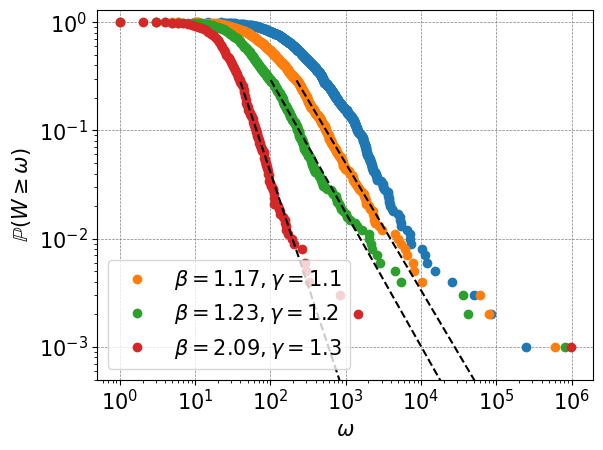

In [11]:
#Plot output of above
plt.loglog(*tails_fitness[0],'o')
b1=np.round(fitness_tail_fits[0][3],2)
b2=np.round(fitness_tail_fits[1][3],2)
b3=np.round(fitness_tail_fits[2][3],2)
plt.loglog(*tails_fitness[1],'o',label=r'$\beta={},\gamma={}$'.format(b1,gs[1]))
plt.loglog(*tails_fitness[2],'o',label=r'$\beta={},\gamma={}$'.format(b2,np.round(gs[2],2)))
plt.loglog(*tails_fitness[3],'o',label=r'$\beta={},\gamma={}$'.format(b3,np.round(gs[3],2)))
plt.loglog(fitness_tail_fits[0][0],fitness_tail_fits[0][1],color='black',linestyle='--')
plt.loglog(fitness_tail_fits[1][0],fitness_tail_fits[1][1],color='black',linestyle='--')
plt.loglog(fitness_tail_fits[2][0],fitness_tail_fits[2][1],color='black',linestyle='--')
add_labels(plt,*label_arr)
plt.ylim(5*10**-4,1.3)

In [12]:
'''
Find approximation of t in jump process corresponding to the nth iteration of feedback model
'''

t_tests=np.arange(0.01,1,0.01)
        
t_g1=find_t_g1(t_tests, w_fitness[0], w0_binom, fitness)
t_g1_1=find_t_g(t_tests, w_fitness[1], w0_binom, gs[1], fitness)
t_g1_2=find_t_g(t_tests, w_fitness[2], w0_binom, gs[2], fitness)
t_g1_3=find_t_g(t_tests, w_fitness[3], w0_binom, gs[3], fitness)

t_tests1=np.arange(t_g1_3,t_g1_3+0.01,0.001)

t_g1_3=find_t_g(t_tests1, w_fitness[3], w0_binom, gs[3], fitness)

print(t_g1,t_g1_1,t_g1_2,t_g1_3)

0.79 0.41000000000000003 0.21000000000000002 0.121


/home/samuel/Documents/other/other_p/research/urns/code/urn_python_code/urn_functions.py:136: RuntimeWarning: invalid value encountered in power
  k1=k**(-1/(g-1)) #g>1


In [13]:
#checking for initial times
print(dif_sum_func_g1(t_g1,np.sum(w_fitness[0]),w0_binom,fitness))
print(dif_sum_func_g1(t_g1+0.01,np.sum(w_fitness[0]),w0_binom,fitness))
print('')
print(dif_sum_func(t_g1_1,np.sum(w_fitness[1]),w0_binom,gs[1],fitness))
print(dif_sum_func(t_g1_1+0.01,np.sum(w_fitness[1]),w0_binom,gs[1],fitness))
print('')
print(dif_sum_func(t_g1_2,np.sum(w_fitness[2]),w0_binom,gs[2],fitness))
print(dif_sum_func(t_g1_2+0.01,np.sum(w_fitness[2]),w0_binom,gs[2],fitness))
print('')
print(dif_sum_func(t_g1_3,np.sum(w_fitness[3]),w0_binom,gs[3],fitness))
print(dif_sum_func(t_g1_3+0.001,np.sum(w_fitness[3]),w0_binom,gs[3],fitness))

72452.72445745359
-5978.734321575146

281069.6269970387
-3699.102372389054

696586.2153574566
-228405.15954572032

223707.32594440388
-635786.6689695283


In [14]:
'''
Finds expected wealth at time t approximated above
'''

init_ts=[t_g1,t_g1_1,t_g1_2,t_g1_3] #chosen using above

w_fitness_pred=[]

for i in range(len(w_fitness)):
    total=np.sum(w_fitness[i])
    init_t=init_ts[i]
    if i==0:
        params=[total,w0_binom,fitness]
        t_pred=get_time_g1(init_t,*params)
        print(t_pred)
        w_pred=expected_wealth_fit_pred_g1(t_pred,w0_binom,fitness)
        print(i)
    else:
        g=gs[i]
        params=[total,w0_binom,g,fitness]
        t_pred=get_time(init_t,*params)
        print(t_pred)
        w_pred=expected_wealth_fit_pred(t_pred,w0_binom,g,fitness)
        print(i)
        
    w_fitness_pred.append([t_pred,w_pred]) 
        

0.7992688175035559
0
0.4198946328192324
1
0.21881328184585683
2
0.12136923792356986
3


Text(10, 10000, '$\\gamma=1.3,\\,t=0.12$')

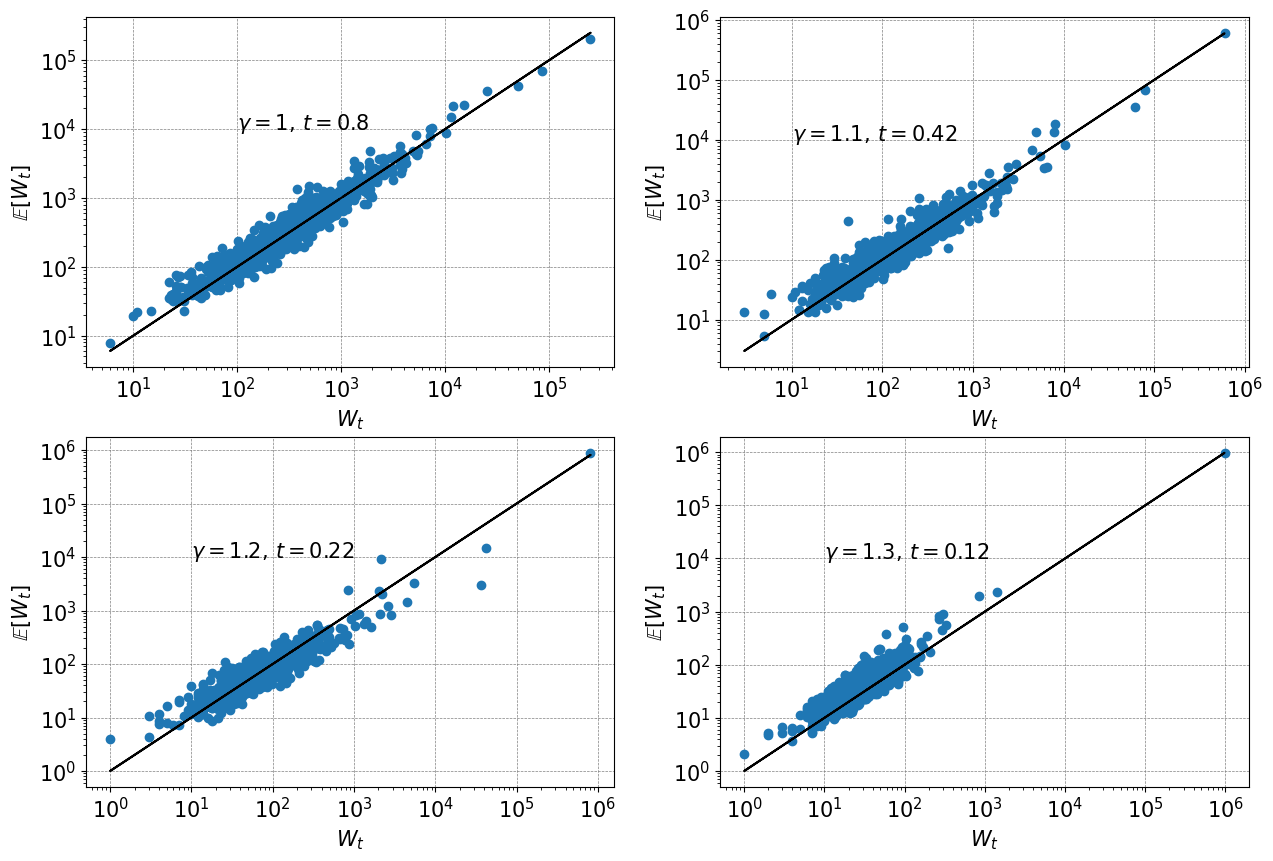

In [15]:
'''
Plot of expected wealth against actual wealth from feeback function
'''

plt.figure(figsize=(15,10))

label_arr_w_pred=[r'$W_t$',r'$\mathbb{E}[W_t]$',font_sizes,0]

t1=np.round(w_fitness_pred[0][0],2)
t2=np.round(w_fitness_pred[1][0],2)
t3=np.round(w_fitness_pred[2][0],2)
t4=np.round(w_fitness_pred[3][0],2)

plt.subplot(2,2,1)
plt.loglog(w_fitness[0],w_fitness_pred[0][1],'o')
plt.loglog(w_fitness[0],w_fitness[0],color='black')
add_labels(plt,*label_arr_w_pred)
plt.text(10**2,10**4,r'$\gamma={},\,t={}$'.format(gs[0],t1),fontsize=15)

plt.subplot(2,2,2)
plt.loglog(w_fitness[1],w_fitness_pred[1][1],'o')
plt.loglog(w_fitness[1],w_fitness[1],color='black')
add_labels(plt,*label_arr_w_pred)
plt.text(10,10**4,r'$\gamma={},\,t={}$'.format(gs[1],t2),fontsize=15)

plt.subplot(2,2,3)
plt.loglog(w_fitness[2],w_fitness_pred[2][1],'o')
plt.loglog(w_fitness[2],w_fitness[2],color='black')
add_labels(plt,*label_arr_w_pred)
plt.text(10,10**4,r'$\gamma={},\,t={}$'.format(gs[2],t3),fontsize=15)

plt.subplot(2,2,4)
plt.loglog(w_fitness[3],w_fitness_pred[3][1],'o')
plt.loglog(w_fitness[3],w_fitness[3],color='black')
add_labels(plt,*label_arr_w_pred)
plt.text(10,10**4,r'$\gamma={},\,t={}$'.format(gs[3],t4),fontsize=15)

# plt.savefig(direc_save+'urn_expectation_preds',bbox_inches = 'tight')

## Sum formula prediction


Run the sum formula for the mass function $p_t(\omega)$ and plot with approximations for different $\gamma$ and $\omega_0$

In [16]:
#Marker types for plot
markers=['o','v','^','<','>','1','2','3','4','8','s']

In [17]:
#Find sum formula prediction for specific \gamma but different times and w_0=1
g_sum=1.4
t_sum=np.arange(1,5.5,0.5)
print(t_sum)
w0_sum=1
w_s_sum=300

w_sums_t=[]
for i in range(len(t_sum)):
    w,A,p=get_sum_p(g_sum,t_sum[i],w0_sum,w_s_sum)
    w_sums_t.append([w,A,p])

[1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


<module 'matplotlib.pyplot' from '/home/samuel/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

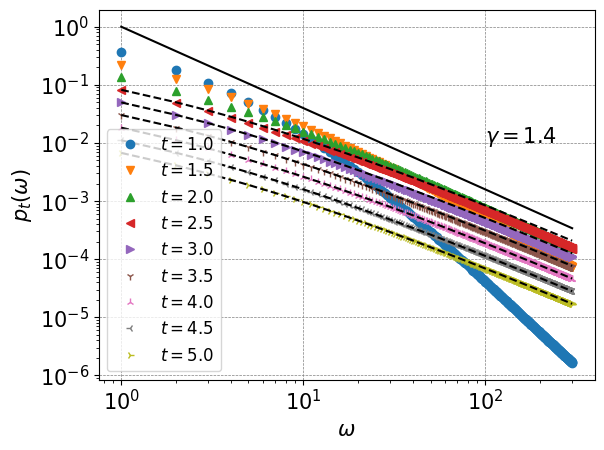

In [18]:
#Resulting plot
label_arr_dens_sum_pred=[r'$\omega$',r'$p_t(\omega)$',font_sizes1,1]

for i in range(len(w_sums_t)):
    w=w_sums_t[i][0]
    p=w_sums_t[i][2]
    plt.loglog(w,p,markers[i],label=r'$t={}$'.format(t_sum[i]))

#Plot of approximation
for i in range(3,len(w_sums_t)):
    plt.loglog(w,master_approx1(w0_sum,w,g_sum,t_sum[i]),color='black',linestyle='--')

#Plot of power law line
plt.loglog(w,power_law(w,1,-g_sum),color='black',linestyle='-')
    
    
plt.text(10**2,10**(-2),r'$\gamma={}$'.format(g_sum),fontsize=15)
add_labels(plt,*label_arr_dens_sum_pred)

# plt.savefig(direc_save+'urn_sum_pred_t',bbox_inches = 'tight')

In [19]:
#Find sum formula prediction for specific \gamma but different times and w_0 not equal to 1
g_sum1=1.4
t_sum1=np.arange(1.0,5.5,0.5)
s_ind1=np.asarray(np.zeros(len(t_sum)),int)
s_ind1[0]=7
print(s_ind1)
print(t_sum1)
w0_sum1=2
w_s_sum1=300

w_sums_t1=[]
for i in range(len(t_sum1)):
    w,A,p=get_sum_p(g_sum1,t_sum1[i],w0_sum1,w_s_sum1) #can have nan values 
    w_sums_t1.append([w,A,p])

[7 0 0 0 0 0 0 0 0]
[1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


/home/samuel/Documents/other/other_p/research/urns/code/urn_python_code/urn_functions.py:206: RuntimeWarning: invalid value encountered in multiply
  p_s=np.sum(A[i]*np.exp(-(j**g)*t))


<module 'matplotlib.pyplot' from '/home/samuel/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

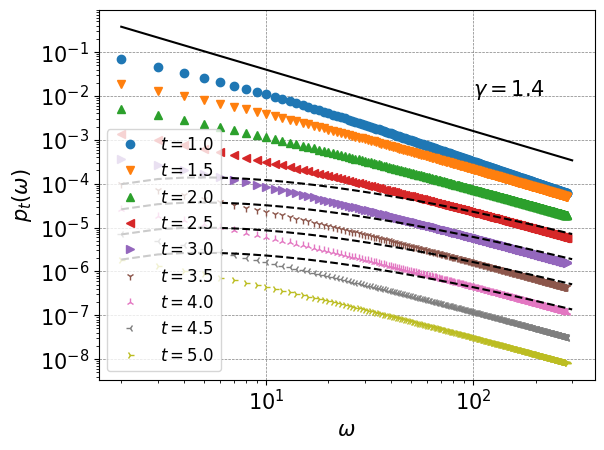

In [20]:
#Plot of above
for i in range(len(w_sums_t1)):
    w=w_sums_t1[i][0]
    p=w_sums_t1[i][2]
    plt.loglog(w,p,markers[i],label=r'$t={}$'.format(t_sum1[i]))

#Plot of approximation
for i in range(5,len(w_sums_t1)):
    plt.loglog(w,master_approx1(w0_sum1,w,g_sum1,t_sum1[i]),color='black',linestyle='--')

#Plot of power law line
plt.loglog(w,power_law(w,1,-g_sum1),color='black',linestyle='-')
    
    
plt.text(10**2,10**(-2),r'$\gamma={}$'.format(g_sum1),fontsize=15)
add_labels(plt,*label_arr_dens_sum_pred)

# plt.savefig(direc_save+'urn_sum_pred_t1',bbox_inches = 'tight')

In [21]:
#Run sum formula for different gammas

def vec_int(x):
    return np.asarray(x,int)

incr=0.2
gs_sum=np.arange(1,2+incr/2,incr)
n_sum=len(gs_sum)
ts_sum=np.ones(n_sum)*4
w0s_sum=vec_int(np.ones(n_sum)*1)
w_ss_sum=vec_int(np.ones(n_sum)*300)


print(gs_sum)
print(ts_sum)
print(w0s_sum)
print(w_ss_sum)

sum_preds=[]

for i in range(n_sum):
    w,A,p=get_sum_p(gs_sum[i],ts_sum[i],w0s_sum[i],w_ss_sum[i])
    sum_preds.append([w,A,p])
    
l=np.exp(-ts_sum[0])

print(l)

[1.  1.2 1.4 1.6 1.8 2. ]
[4. 4. 4. 4. 4. 4.]
[1 1 1 1 1 1]
[300 300 300 300 300 300]
0.01831563888873418


<module 'matplotlib.pyplot' from '/home/samuel/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

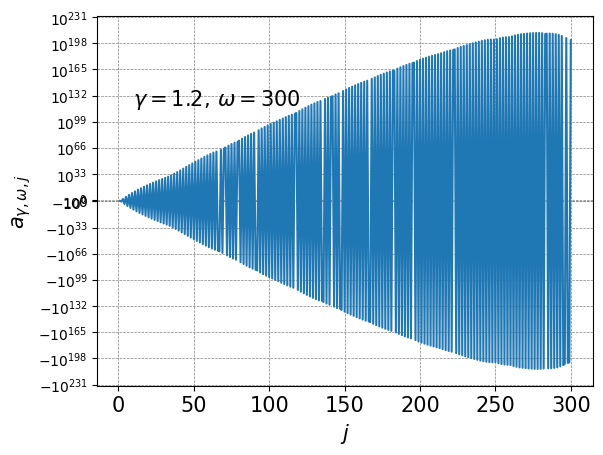

In [22]:
#Plot of summands from sum formula
font_sizes_summand=[15,15,15,10,15]
label_arr_summand=[r'$j$',r'$a_{\gamma,\omega,j}$',font_sizes_summand,0]

k=299
i=1

plt.plot(np.arange(1,k+2,1),sum_preds[i][1][k])


plt.yscale('symlog')

plt.text(10,10**120,r'$\gamma={}, \, \omega={}$'.format(gs_sum[i],w_ss_sum[i]),fontsize=15)

add_labels(plt,*label_arr_summand)

# plt.savefig(direc_save+'urn_summands',bbox_inches = 'tight')

<module 'matplotlib.pyplot' from '/home/samuel/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

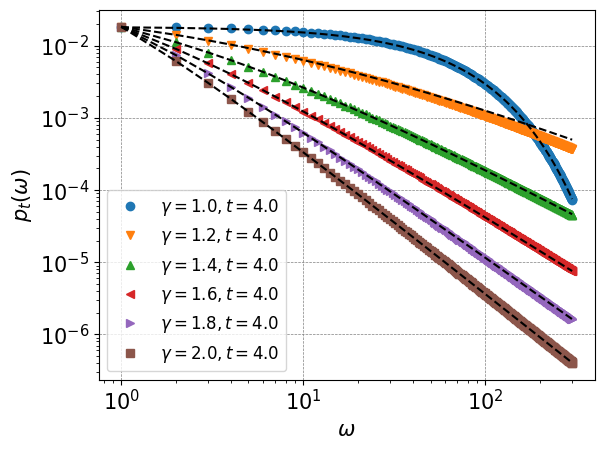

In [23]:
#Plot of sum formula for differerent gammas along with approximation
counter_types=['o','v','^','<','>','s','1','2','3','4','8']

for i in range(n_sum):
    plt.loglog(sum_preds[i][0],sum_preds[i][2],counter_types[i],
               label=r'$\gamma={}, t={}$'.format(np.round(gs_sum[i],2),ts_sum[i]))

            
w1=sum_preds[0][0]
w2=sum_preds[1][0]
w3=sum_preds[2][0]
w4=sum_preds[3][0]
w5=sum_preds[4][0]
w6=sum_preds[5][0]

plt.loglog(w1,l*exp_tail(w1,l),color='black',linestyle='--')

for i in range(1,len(sum_preds)):
    w=sum_preds[i][0]
    plt.loglog(w,master_approx1(w0s_sum[i],w,gs_sum[i],ts_sum[i]),color='black',linestyle='--')

add_labels(plt,*label_arr_dens_sum_pred)

# plt.savefig(direc_save+'urn_sum_preds',bbox_inches = 'tight')

## Aggregations of urn model

Run agregation of urn model for different $\gamma$ and plot empirical tail of non-monopoly agents $L_n$

In [24]:
N_mult=10
w0_mult=np.ones(N_mult)
w_add_mult=1
g_mults=[1.2,1.4,1.6,1.8,2]
T_mult=10**4
ns_mult=1000

In [25]:
%%time

w_mult_concat_minus_v=[]

for i in tqdm(range(len(g_mults))):
    w_mult=nl_Polya_urn_mult_times(w0_mult,w_add_mult,g_mults[i],T_mult,ns_mult)
    
    w_mult_concat_minus=get_losing(w_mult[0])

    for i in range(1,len(w_mult)):
        w_new=get_losing(w_mult[i])
        w_mult_concat_minus=np.concatenate((w_mult_concat_minus,w_new))
        
    w_mult_concat_minus_v.append(w_mult_concat_minus)
        

100%|████████████████████████████████████████████| 5/5 [09:51<00:00, 118.38s/it]

CPU times: user 9min 51s, sys: 96 ms, total: 9min 51s
Wall time: 9min 51s


In [26]:
mult_times_preds=[]

for i in range(len(w_mult_concat_minus_v)):
    w_mult_concat_minus=w_mult_concat_minus_v[i]
    x,y=tail(w_mult_concat_minus)
    mult_times_preds.append([x,y])
#     s=x_min_pred(w_mult_concat_minus)
#     x_min=s[1]
#     p=get_power_law_fit(w_mult_concat_minus,x_min)
#     mult_times_preds.append([x,y,x_min,p])
#     print(p[3],g_mults[i]-1)

<module 'matplotlib.pyplot' from '/home/samuel/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

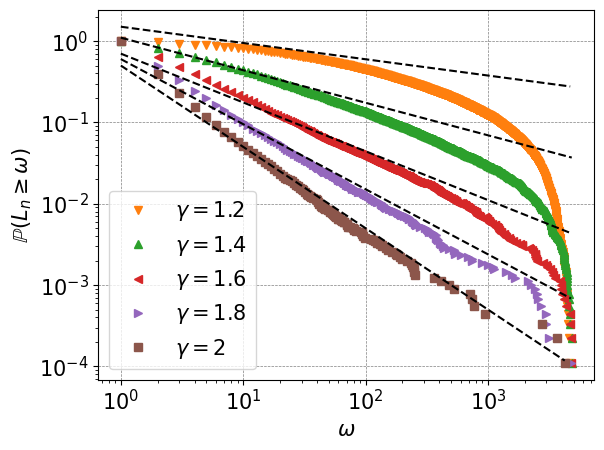

In [27]:
colors=['tab:orange','tab:green','tab:red','tab:purple','tab:brown']
counter_types=['o','v','^','<','>','s','1','2','3','4','8']

for i in range(len(mult_times_preds)):
    plt.loglog(mult_times_preds[i][0],mult_times_preds[i][1],counter_types[i+1],
               label=r'$\gamma={}$'.format(g_mults[i]),color=colors[i])
#     plt.loglog(mult_times_preds[i][3][0],mult_times_preds[i][3][1],color='black',linestyle='--')

w_agg0=mult_times_preds[0][0]
w_agg1=mult_times_preds[1][0]
w_agg2=mult_times_preds[2][0]
w_agg3=mult_times_preds[3][0]
w_agg4=mult_times_preds[4][0]

plt.loglog(w_agg0,power_law(w_agg0,1.5,1-g_mults[0]),color='black',linestyle='--')
plt.loglog(w_agg1,power_law(w_agg1,1.1,1-g_mults[1]),color='black',linestyle='--')
plt.loglog(w_agg2,power_law(w_agg2,0.7,1-g_mults[2]),color='black',linestyle='--')
plt.loglog(w_agg3,power_law(w_agg3,0.6,1-g_mults[3]),color='black',linestyle='--')
plt.loglog(w_agg4,power_law(w_agg4,0.5,1-g_mults[4]),color='black',linestyle='--')

add_labels(plt,*label_arrL)

# plt.savefig(direc_save+'urn_agg_tails',bbox_inches = 'tight')

## Pure birth process

Run the pure birth process $W_t$ multiple times and plot empirical tail of 'loser process' $L_t$ (those agents that are not monopoly ones) 

In [28]:
label_arr_pbp0=[r'$\omega$',r'$\mathbb{P}(W_t\geq \omega)$',font_sizes,0]
label_arr_pbp=[r'$\omega$',r'$\mathbb{P}(W_t\geq \omega)$',font_sizes,1]
label_arr_pbp1=[r'$\omega$',r'$\mathbb{P}(W_t\geq \omega)$',font_sizes1,1]
label_arr_lp=[r'$\omega$',r'$\mathbb{P}(L_t\geq \omega)$',font_sizes,1]
label_arr_lp0=[r'$\omega$',r'$\mathbb{P}(L_t\geq \omega)$',font_sizes,0]
label_arr_lp1=[r'$\omega$',r'$\mathbb{P}(L_t \geq \omega)$',font_sizes1,1]

In [29]:
w_add=1
a=1
g=2
jt_max=1
w_max=2*10**2
runs=10**3

In [30]:
%%time
ws=[]
for i in tqdm(range(runs)):
    w=1.0
    w=pure_birth_process_single(w,w_add,a,g,jt_max,w_max)
    ws.append(w)

100%|██████████████████████████████████████| 1000/1000 [00:02<00:00, 468.48it/s]

CPU times: user 2.2 s, sys: 108 ms, total: 2.31 s
Wall time: 2.14 s


In [31]:
ws=np.asarray(ws,float)
ws1=ws[ws<w_max]
print(len(ws),len(ws1))
x,y=tail(ws)
x_l,y_l=tail(ws1)

1000 719


<module 'matplotlib.pyplot' from '/home/samuel/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

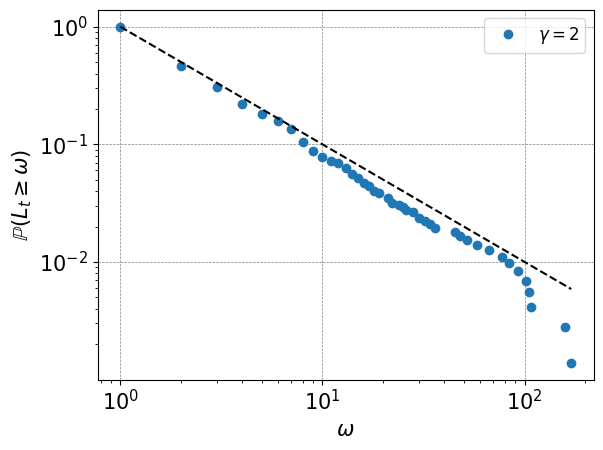

In [32]:
plt.loglog(x_l,y_l,'o',label=r'$\gamma={}$'.format(np.round(g,2)))
plt.loglog(x_l,x_l**-(g-1),color='black',linestyle='--')
add_labels(plt,*label_arr_lp1)

<module 'matplotlib.pyplot' from '/home/samuel/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

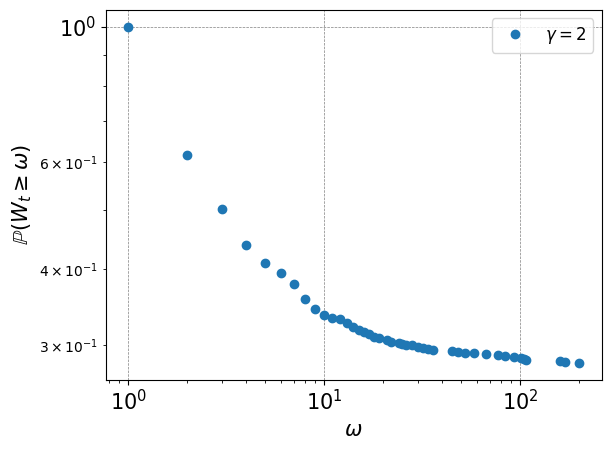

In [33]:
plt.loglog(x,y,'o',label=r'$\gamma={}$'.format(np.round(g,2)))
# plt.loglog(x,x**-(g-1))
# plt.xlim(1,10**2)
add_labels(plt,*label_arr_pbp1)

In [34]:
ts=np.arange(0.1,1+0.1,0.1)
n=len(ts)
print(ts,n)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] 10


In [35]:
%%time

w_add=1
a=1
g=2
w_max=2*10**2
runs=10**3

wts=[]

for t in ts:
    ws=[]
    for i in range(runs):
        w=1.0
        w=pure_birth_process_single(w,w_add,a,g,t,w_max)
        ws.append(w)
    print(t)
    wts.append(ws)

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9
1.0
CPU times: user 8.43 s, sys: 476 ms, total: 8.91 s
Wall time: 8.11 s


In [36]:
tails_l=[]
tails_w=[]
for i in range(n):
    w=np.asarray(wts[i],float)
    l=w[w<w_max]
    x_l,y_l=tail(l)
    x_w,y_w=tail(w)
    tails_l.append([x_l,y_l])
    tails_w.append([x_w,y_w])

In [37]:
x=np.arange(1,2*10**2+1,1)
x=np.asarray(x,float)

Text(100, 0.1, '$\\gamma=2$')

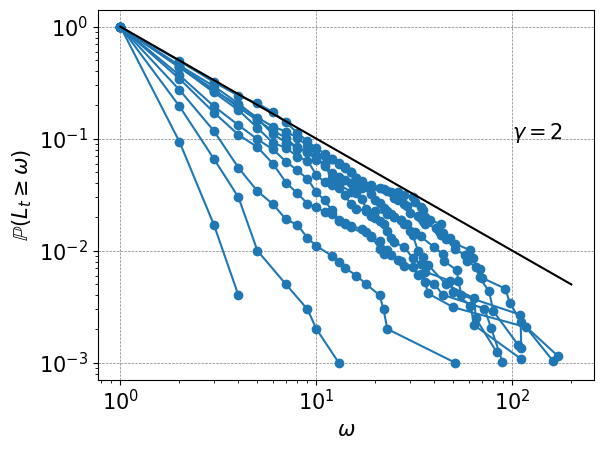

In [38]:
for i in range(n):
    plt.loglog(*tails_l[i],'-o',color='tab:blue')

plt.loglog(x,x**(-(g-1)),color='black')
add_labels(plt,*label_arr_lp0)

plt.text(10**2,10**-1,r'$\gamma={}$'.format(np.round(g,2)),fontsize=15)

# plt.savefig(direc_save+'lg2',bbox_inches = 'tight')

<module 'matplotlib.pyplot' from '/home/samuel/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

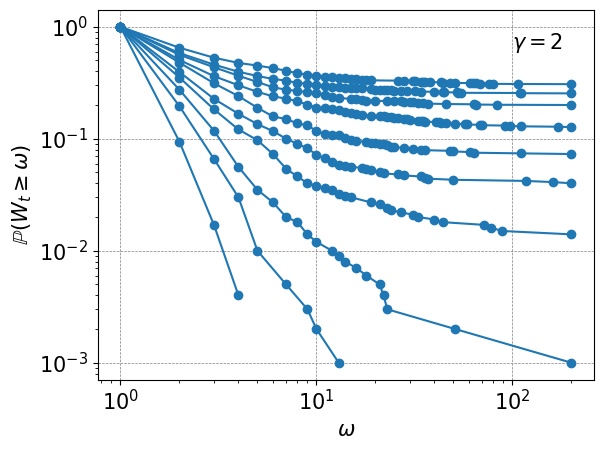

In [39]:
for i in range(n):
    plt.loglog(*tails_w[i],'-o',color='tab:blue')

# plt.loglog(x,0.8*x**(-(g-1)),color='black')
# plt.xlim(1,10**2)
# plt.ylim(10**-2,1.2)

plt.text(10**2,10**-0.2,r'$\gamma={}$'.format(np.round(g,2)),fontsize=15)

add_labels(plt,*label_arr_pbp0)

# plt.savefig(direc_save+'wg2',bbox_inches = 'tight')

In [40]:
#Directory with C++ simulations of above 

direc1="/home/samuel/Documents/other/other_p/research/urns/code/urn_C++_code/output_bp/" 

vpbp_t0_1g2_0=pd.read_csv(direc1+'pbp_t0.1g2.0.txt',sep='\t').values
vpbp_t0_2g2_0=pd.read_csv(direc1+'pbp_t0.2g2.0.txt',sep='\t').values
vpbp_t0_3g2_0=pd.read_csv(direc1+'pbp_t0.3g2.0.txt',sep='\t').values
vpbp_t0_4g2_0=pd.read_csv(direc1+'pbp_t0.4g2.0.txt',sep='\t').values
vpbp_t0_5g2_0=pd.read_csv(direc1+'pbp_t0.5g2.0.txt',sep='\t').values
vpbp_t0_6g2_0=pd.read_csv(direc1+'pbp_t0.6g2.0.txt',sep='\t').values
vpbp_t0_7g2_0=pd.read_csv(direc1+'pbp_t0.7g2.0.txt',sep='\t').values
vpbp_t0_8g2_0=pd.read_csv(direc1+'pbp_t0.8g2.0.txt',sep='\t').values
vpbp_t0_9g2_0=pd.read_csv(direc1+'pbp_t0.9g2.0.txt',sep='\t').values
vpbp_t1_0g2_0=pd.read_csv(direc1+'pbp_t1.0g2.0.txt',sep='\t').values

vpbp_t1_1g2_0=pd.read_csv(direc1+'pbp_t1.1g2.0.txt',sep='\t').values
vpbp_t1_2g2_0=pd.read_csv(direc1+'pbp_t1.2g2.0.txt',sep='\t').values
vpbp_t1_3g2_0=pd.read_csv(direc1+'pbp_t1.3g2.0.txt',sep='\t').values
vpbp_t1_4g2_0=pd.read_csv(direc1+'pbp_t1.4g2.0.txt',sep='\t').values
vpbp_t1_5g2_0=pd.read_csv(direc1+'pbp_t1.5g2.0.txt',sep='\t').values
vpbp_t1_6g2_0=pd.read_csv(direc1+'pbp_t1.6g2.0.txt',sep='\t').values
vpbp_t1_7g2_0=pd.read_csv(direc1+'pbp_t1.7g2.0.txt',sep='\t').values
vpbp_t1_8g2_0=pd.read_csv(direc1+'pbp_t1.8g2.0.txt',sep='\t').values
vpbp_t1_9g2_0=pd.read_csv(direc1+'pbp_t1.9g2.0.txt',sep='\t').values
vpbp_t2_0g2_0=pd.read_csv(direc1+'pbp_t2.0g2.0.txt',sep='\t').values

In [41]:
v=[vpbp_t0_1g2_0,vpbp_t0_2g2_0,vpbp_t0_3g2_0,vpbp_t0_4g2_0,vpbp_t0_5g2_0,
  vpbp_t0_6g2_0,vpbp_t0_7g2_0,vpbp_t0_8g2_0,vpbp_t0_9g2_0,vpbp_t1_0g2_0,
  vpbp_t1_1g2_0,vpbp_t1_2g2_0,vpbp_t1_3g2_0,vpbp_t1_4g2_0,vpbp_t1_5g2_0,
  vpbp_t1_6g2_0,vpbp_t1_7g2_0,vpbp_t1_8g2_0,vpbp_t1_9g2_0,vpbp_t2_0g2_0]

tails_l_cpp=[]
tails_w_cpp=[]

for i in range(len(v)):
    v_i=v[i]
    m=10**4
    l=v_i[v_i<m]
    w=v_i[v_i<=m]
    x_l,y_l=tail(l)
    x_w,y_w=tail(w)
    tails_l_cpp.append([x_l,y_l])
    tails_w_cpp.append([x_w,y_w])

<module 'matplotlib.pyplot' from '/home/samuel/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

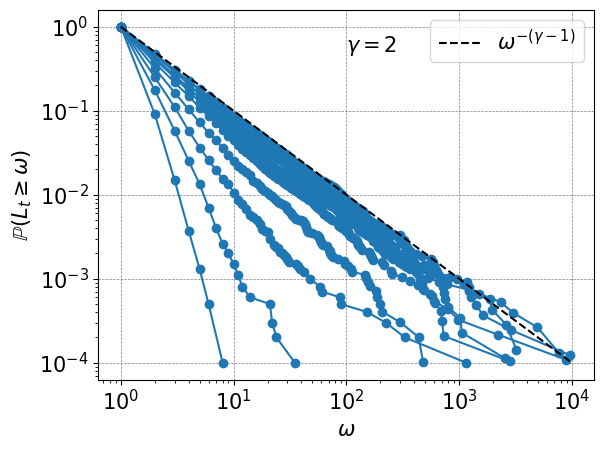

In [42]:
for i in range(len(v)-10):
    plt.loglog(*tails_l_cpp[i],'-o',color='tab:blue')
    
plt.text(10**2,10**-0.3,r'$\gamma=2$',fontsize=15)

x=np.arange(1,10**4+1,1)
x=np.asarray(x,float)

plt.loglog(x,x**(1-g),'--',color='black',label=r'$\omega^{-(\gamma-1)}$')
add_labels(plt,*label_arr_lp)

# plt.xlim(1.5,10**4)
# plt.ylim(10**-2,1.5)

# plt.savefig(direc_save+'lg2cpp',bbox_inches = 'tight')

Text(50.0, 0.6309573444801932, '$\\gamma=2$')

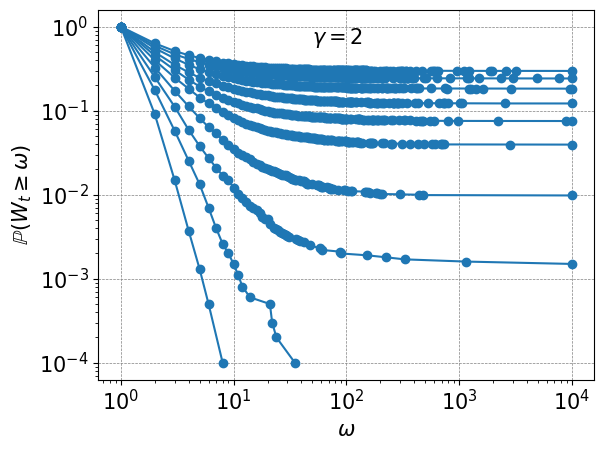

In [43]:
for i in range(len(v)-10):
    plt.loglog(*tails_w_cpp[i],'-o',color='tab:blue')
    
# plt.loglog(x,x**(1-g),color='black')
add_labels(plt,*label_arr_pbp0)

plt.text(0.5*10**2,10**-0.2,r'$\gamma=2$',fontsize=15)

# plt.xlim(1.8,10**2)
# plt.ylim(10**-2,1.5)

# plt.savefig(direc_save+'wg2cpp',bbox_inches = 'tight')

In [44]:
w_add=1
a=1
gs=np.asarray([1.2,1.4,1.6,1.8,2.0],float)
n=len(gs)
jt_maxs=exp_expl_time(gs)
print(jt_maxs)
w_max=300
runs=10**4

[5.         2.5        1.66666667 1.25       1.        ]


In [45]:
%%time
ws_g=[]
for i in range(n):
    ws=[]
    for j in tqdm(range(runs)):
        w=1.0
        w=pure_birth_process_single(w,w_add,a,gs[i],jt_maxs[i],w_max)
        ws.append(w)
    ws_g.append(ws)

100%|████████████████████████████████████| 10000/10000 [00:33<00:00, 295.01it/s]

CPU times: user 4min 28s, sys: 11.1 s, total: 4min 39s
Wall time: 4min 19s


In [46]:
tails=[]
for i in range(n):
    ws=np.asarray(ws_g[i],int)
    ws1=ws[ws<w_max]
    x,y=tail(ws1)
    tails.append([x,y])
    print(len(ws),len(ws1))

10000 1579
10000 5453
10000 6528
10000 6810
10000 6962


<module 'matplotlib.pyplot' from '/home/samuel/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

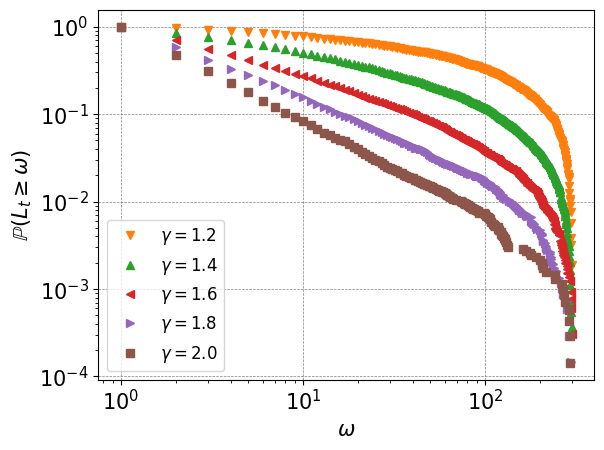

In [47]:
coefs=[1,1,1,1,1]
colors=['tab:orange','tab:green','tab:red','tab:purple','tab:brown']
counter_types=['o','v','^','<','>','s','1','2','3','4','8']

for i in range(n):
    plt.loglog(*tails[i],counter_types[i+1],label=r'$\gamma={}$'.format(np.round(gs[i],2)),
               color=colors[i])
#     x=tails[i][0]
#     plt.loglog(x,coefs[i]*x**-(gs[i]-1),color='black',linestyle='--')
    
add_labels(plt,*label_arr_lp1)

# plt.savefig(direc_save+'urn_agg_tails1',bbox_inches = 'tight')

## C++ simulations of pure birth process

Read in C++ simulations of aggregations of $10^4$ realisations of pure birth process. Plot of empirical tail of $W_t$ and loser process $L_t$ with monopoly agents removed. $\omega_0=1$ and feedback function
$f(\omega)= \omega^{\gamma}$ for different $\gamma>1\,.$

In [48]:
#Directory with C++ simulations of above 

direc1="/home/samuel/Documents/other/other_p/research/urns/code/urn_C++_code/output_bp/" 

In [49]:
#Read in the .txt files

#Aggregate of N=10^4 simulations, f(w)=w^{g}, w_0=1, w_max=10^5, up to t=1/(g-1)


v1=pd.read_csv(direc1+'pbp_g1.2.txt',sep='\t').values
v2=pd.read_csv(direc1+'pbp_g1.4.txt',sep='\t').values
v3=pd.read_csv(direc1+'pbp_g1.6.txt',sep='\t').values
v4=pd.read_csv(direc1+'pbp_g1.8.txt',sep='\t').values
v5=pd.read_csv(direc1+'pbp_g2.0.txt',sep='\t').values


In [51]:
v1_max=np.max(v1)
v2_max=np.max(v2)
v3_max=np.max(v3)
v4_max=np.max(v4)
v5_max=np.max(v5)


In [52]:
v1a=v1[v1<=v1_max]
v2a=v2[v2<=v2_max]
v3a=v3[v3<=v3_max]
v4a=v4[v4<=v4_max]
v5a=v5[v5<=v5_max]

#Remove max values assuming these are monopoly agents
v1b=v1[v1<v1_max]
v2b=v2[v2<v2_max]
v3b=v3[v3<v3_max]
v4b=v4[v4<v4_max]
v5b=v5[v5<v5_max]


In [53]:
x1a,y1a=tail(v1a)
x2a,y2a=tail(v2a)
x3a,y3a=tail(v3a)
x4a,y4a=tail(v4a)
x5a,y5a=tail(v5a)

x1b,y1b=tail(v1b)
x2b,y2b=tail(v2b)
x3b,y3b=tail(v3b)
x4b,y4b=tail(v4b)
x5b,y5b=tail(v5b)


<module 'matplotlib.pyplot' from '/home/samuel/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

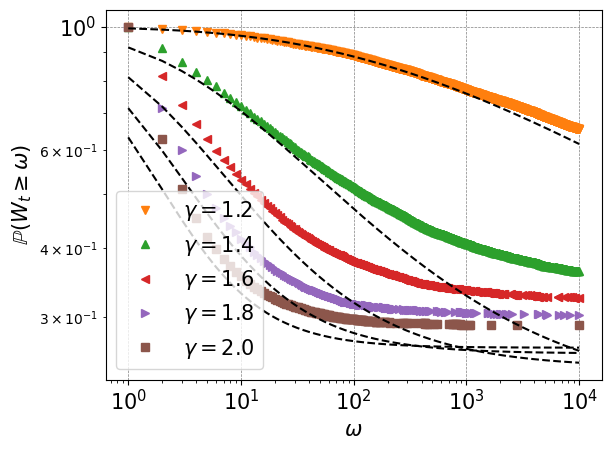

In [59]:
colors=['tab:orange','tab:green','tab:red','tab:purple','tab:brown']
counter_types=['o','v','^','<','>','s','1','2','3','4','8']

plt.loglog(x1a,y1a,counter_types[1],label=r'$\gamma=1.2$',color=colors[0])
plt.loglog(x2a,y2a,counter_types[2],label=r'$\gamma=1.4$',color=colors[1])
plt.loglog(x3a,y3a,counter_types[3],label=r'$\gamma=1.6$',color=colors[2])
plt.loglog(x4a,y4a,counter_types[4],label=r'$\gamma=1.8$',color=colors[3])
plt.loglog(x5a,y5a,counter_types[5],label=r'$\gamma=2.0$',color=colors[4])

w_0=1
w_m=10**4
w=np.arange(w_0,w_m+1,1)
gs=np.asarray([1.2,1.4,1.6,1.8,2],float)
ts=exp_expl_time(gs)

plt.loglog(w,1-np.cumsum(master_approx1(w_0,w,gs[0],ts[0])),color='black',linestyle='--')
plt.loglog(w,1-np.cumsum(master_approx1(w_0,w,gs[1],ts[1])),color='black',linestyle='--')
plt.loglog(w,1-np.cumsum(master_approx1(w_0,w,gs[2],ts[2])),color='black',linestyle='--')
plt.loglog(w,1-np.cumsum(master_approx1(w_0,w,gs[3],ts[3])),color='black',linestyle='--')
plt.loglog(w,1-np.cumsum(master_approx1(w_0,w,gs[4],ts[4])),color='black',linestyle='--')
           
add_labels(plt,*label_arr_pbp)

# plt.xlim(1,300)

# plt.savefig(direc_save+'urn_agg_tails2a',bbox_inches = 'tight')

2.5000000000000004


<module 'matplotlib.pyplot' from '/home/samuel/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

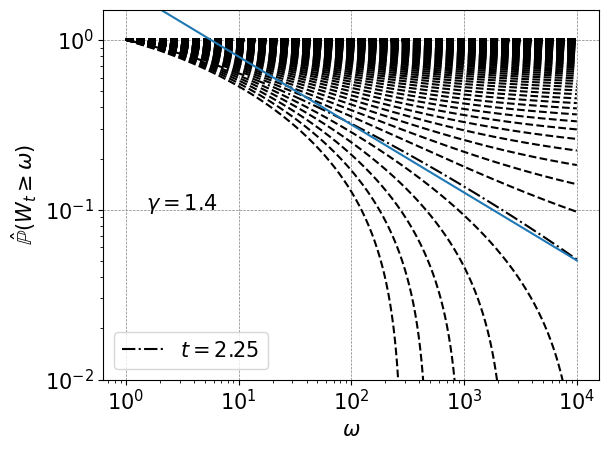

In [60]:
label_arr_pbp3=[r'$\omega$',r'$\hat{\mathbb{P}}(W_t \geq \omega)$',font_sizes,1]
w_0=1
w_m=10**4
w=np.arange(w_0,w_m,1)
g=1.4
t=2.25
tl=1/(g-1)
print(tl)

ts=np.arange(tl*0.8,5*tl,0.05)

p_w1=1-np.concatenate(([0],np.cumsum(master_approx1(w_0,w[:-1],g,t))))

p_ws=[]

for i in range(len(ts)):
    p_w=1-np.concatenate(([0],np.cumsum(master_approx1(w_0,w[:-1],g,ts[i]))))
    p_ws.append(p_w)
    
for i in range(len(p_ws)):
    if i==5:
        plt.loglog(w,p_ws[i],color='black',linestyle='-.',label=r'$t={}$'.format(np.round(ts[i],2)))
    else:
        plt.loglog(w,p_ws[i],color='black',linestyle='--')

plt.text(1.5,10**-1,r'$\gamma={}$'.format(g),fontsize=15)

plt.loglog(w,2.0/w**(g-1))

plt.ylim(0.01,1.5)

add_labels(plt,*label_arr_pbp3)

1.0


<module 'matplotlib.pyplot' from '/home/samuel/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

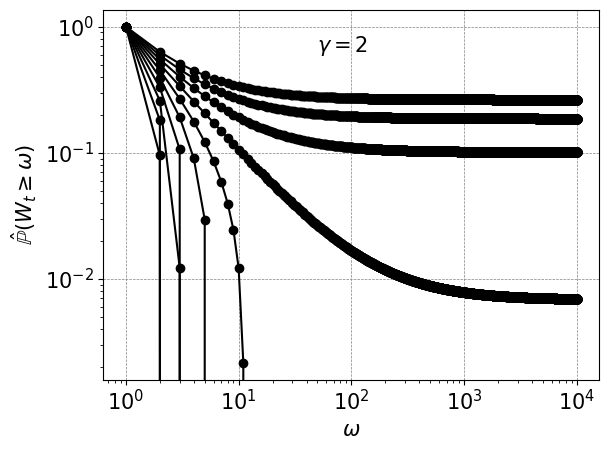

In [61]:
label_arr_pbp30=[r'$\omega$',r'$\hat{\mathbb{P}}(W_t \geq \omega)$',font_sizes,0]
w_0=1
w_m=10**4
w=np.arange(w_0,w_m,1)
g=2
t=2.25
tl=1/(g-1)
print(tl)

ts=np.arange(tl/10,tl+0.1,0.1)

p_w1=1-np.concatenate(([0],np.cumsum(master_approx1(w_0,w[:-1],g,t))))

p_ws=[]

for i in range(len(ts)):
    p_w=1-np.concatenate(([0],np.cumsum(master_approx1(w_0,w[:-1],g,ts[i]))))
    p_ws.append(p_w)
    
for i in range(len(p_ws)):
     plt.loglog(w,p_ws[i],'-o',color='black')
        
plt.text(0.5*10**2,10**-0.2,r'$\gamma={}$'.format(g),fontsize=15)


add_labels(plt,*label_arr_pbp30)

# plt.savefig(direc_save+'urn_tail_approx_g2',bbox_inches = 'tight')

<module 'matplotlib.pyplot' from '/home/samuel/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

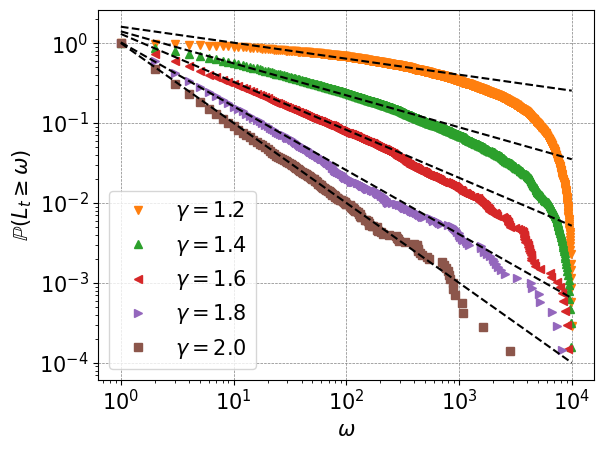

In [64]:
label_arr_pbp_l=[r'$\omega$',r'$\mathbb{P}(L_t\geq\omega)$',font_sizes,1]
colors=['tab:orange','tab:green','tab:red','tab:purple','tab:brown']
counter_types=['o','v','^','<','>','s','1','2','3','4','8']

plt.loglog(x1b,y1b,counter_types[1],label=r'$\gamma=1.2$',color=colors[0])
plt.loglog(x2b,y2b,counter_types[2],label=r'$\gamma=1.4$',color=colors[1])
plt.loglog(x3b,y3b,counter_types[3],label=r'$\gamma=1.6$',color=colors[2])
plt.loglog(x4b,y4b,counter_types[4],label=r'$\gamma=1.8$',color=colors[3])
plt.loglog(x5b,y5b,counter_types[5],label=r'$\gamma=2.0$',color=colors[4])

plt.loglog(x1b,1.6*x1b**-(1.2-1),color='black',linestyle='--')
plt.loglog(x1b,1.4*x1b**-(1.4-1),color='black',linestyle='--')
plt.loglog(x1b,1.3*x1b**-(1.6-1),color='black',linestyle='--')
plt.loglog(x1b,1.02*x1b**-(1.8-1),color='black',linestyle='--')
plt.loglog(x1b,1*x1b**-(2.0-1),color='black',linestyle='--')
           
add_labels(plt,*label_arr_pbp_l)

# plt.savefig(direc_save+'urn_agg_tails2',bbox_inches = 'tight')

One can look into the expected explosion time by taking the average of the jump times up to a certain maximum value for an agent

In [3]:
w=1
w_add=1
a=1
g=1.8
w_max=2*10**2
runs=1000

In [4]:
%%time
pure_birth_process_single_t(w,w_add,a,g,w_max)

CPU times: user 28 ms, sys: 0 ns, total: 28 ms
Wall time: 21.7 ms


2.3260266307183075

In [5]:
%%time
jump_time_runs(runs,w_add,a,g,w_max)

CPU times: user 6.39 s, sys: 40 ms, total: 6.43 s
Wall time: 6.36 s


1.8485794758658818